In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress
from HandyFunctions import calc_scale_height, convert_rprs_to_rpJ

In [8]:
## WASP-96 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resA = np.load('output_arrays/synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fasymA, tdiffA_s, tdifferrA_s = resA['fasyms'], resA['tdiff_seconds'], resA['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resB = np.load('output_arrays/synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fasymB, tdiffB_s, tdifferrB_s = resB['fasyms'], resB['tdiff_seconds'], resB['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resC = np.load('output_arrays/synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fasymC, tdiffC_s, tdifferrC_s = resC['fasyms'], resC['tdiff_seconds'], resC['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## WASP-107 b results
# with specialized cadence, larger scatter
# resAw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
# fasymAw107, tdiffAw107_s, tdifferrAw107_s = resAw107['fasyms'], resAw107['tdiff_seconds'], resAw107['tdiff_err_seconds']
# u1A, u2A = 0.1777 , 0.2952
# resBw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
# fasymBw107, tdiffBw107_s, tdifferrBw107_s = resBw107['fasyms'], resBw107['tdiff_seconds'], resBw107['tdiff_err_seconds']
# u1B, u2B = 0.25, 0.45
resCw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fasymCw107, tdiffCw107_s, tdifferrCw107_s = resCw107['fasyms'], resCw107['tdiff_seconds'], resCw107['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## Gj 1214 b results
resAgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fasymAgj1214, tdiffAgj1214_s, tdifferrAgj1214_s = resAgj1214['fasyms'], resAgj1214['tdiff_seconds'], resAgj1214['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fasymBgj1214, tdiffBgj1214_s, tdifferrBgj1214_s = resBgj1214['fasyms'], resBgj1214['tdiff_seconds'], resBgj1214['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
# resCgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
# fasymCgj1214, tdiffCgj1214_s, tdifferrCgj1214_s = resCgj1214['fasyms'], resCgj1214['tdiff_seconds'], resCgj1214['tdiff_err_seconds']
# u1C, u2C = 0.6, 0.2952

## wasp 39 b results
resAw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fasymAw39, tdiffAw39_s, tdifferrAw39_s = resAw39['fasyms'], resAw39['tdiff_seconds'], resAw39['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fasymBw39, tdiffBw39_s, tdifferrBw39_s = resBw39['fasyms'], resBw39['tdiff_seconds'], resBw39['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resCw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fasymCw39, tdiffCw39_s, tdifferrCw39_s = resCw39['fasyms'], resCw39['tdiff_seconds'], resCw39['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

## wasp 80 b results
resAw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fasymAw80, tdiffAw80_s, tdifferrAw80_s = resAw80['fasyms'], resAw80['tdiff_seconds'], resAw80['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952
resBw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fasymBw80, tdiffBw80_s, tdifferrBw80_s = resBw80['fasyms'], resBw80['tdiff_seconds'], resBw80['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45
resCw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fasymCw80, tdiffCw80_s, tdifferrCw80_s = resCw80['fasyms'], resCw80['tdiff_seconds'], resCw80['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

# np.savez(output_arr_name,
#         fasyms=fasym_arr,
#         tdiff_seconds=t0_diff_seconds_arr, tdiff_err_seconds=t0_diff_seconds_err_arr,
#         chi2red_homog=chi2red_homog_arr, chi2red_asym=chi2red_asym_arr)

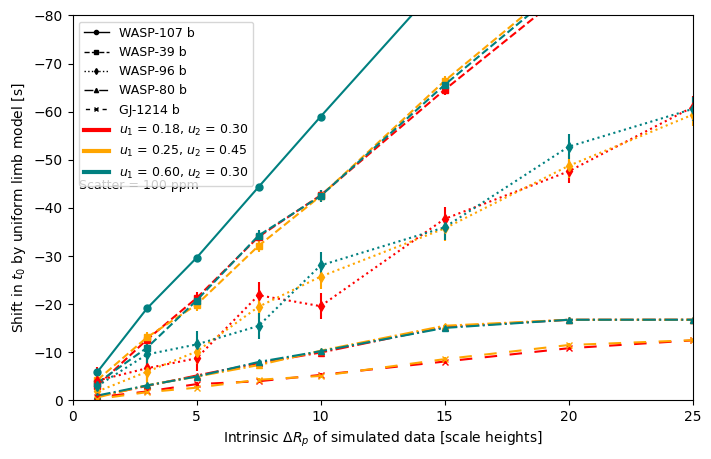

In [10]:
## plotting the different LD scenarios
fig, ax = plt.subplots(figsize=(8,5))

## WASP-107 b:
# LD scenario A 
# ax.errorbar(fasymAw107, tdiffAw107_s, tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
# # LD scenario B
# ax.errorbar(fasymBw107, tdiffBw107_s, tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
# LD scenario C
ax.errorbar(fasymCw107, tdiffCw107_s, tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')

## wasp 39 b:
# LD scenario A 
ax.errorbar(fasymAw39, tdiffAw39_s, tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
# LD scenario B
ax.errorbar(fasymBw39, tdiffBw39_s, tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
# LD scenario C
ax.errorbar(fasymCw39, tdiffCw39_s, tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')

## WASP-96 b:
# LD scenario A 
ax.errorbar(fasymA, tdiffA_s, tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax.errorbar(fasymB, tdiffB_s, tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax.errorbar(fasymC, tdiffC_s, tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

## wasp 80 b:
# LD scenario A 
ax.errorbar(fasymAw80, tdiffAw80_s, tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
# LD scenario B
ax.errorbar(fasymBw80, tdiffBw80_s, tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
# LD scenario C
ax.errorbar(fasymCw80, tdiffCw80_s, tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')

## GJ 1214 b:
# LD scenario A 
ax.errorbar(fasymAgj1214, tdiffAgj1214_s, tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
# LD scenario B
ax.errorbar(fasymBgj1214, tdiffBgj1214_s, tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
# # LD scenario C
# ax.errorbar(fasymCgj1214, tdiffCgj1214_s, tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')


custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
ax.text(0.01, 0.55, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)

ax.set(ylim=(0., -80.))
#ax.set(ylim=(-80., 0.))
ax.set(xlim=(0, 25))
ax.set(xlabel=r'Intrinsic $\Delta R_p$ of simulated data [scale heights]', ylabel=r'Shift in $t_0$ by uniform limb model [s]')

ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=.5, fontsize=9)
#plt.savefig('analysis_figures/t0Rp_plot.png', dpi=350, bbox_inches='tight')
plt.show()

For each x (i.e. each intrinsic limb asymmetry size), the y-value is how much the uniform limb model's transit time needed to be shifted in order to mimic the asymmetric data as best as possible. This does not necessarily mean that the corresponding shift effectively mimicked the asymmetry, given the data's scatter. Nevertheless, each line provides a rough guide for planning observations. That is, in order to discern a given asymmetry size (x-value) in light of the asymmetry-timing degeneracy, you need to know the current transit time (and enforce strong priors!) to within a range equal to the y-value. 

Shallower slope = harder to detect asymmetry because you need very tight timing precision to detect even small asymmetries.

In [12]:
# Fitting these lines with a linear function
# (let's fit just LD scen A)
linfit_w96 = linregress(fasymA, tdiffA_s)
slope_w96, slope_err_w96 = linfit_w96.slope, linfit_w96.stderr
intcpt_w96, intcpt_err_w96 = linfit_w96.intercept, linfit_w96.intercept_stderr

linfit_w107 = linregress(fasymCw107, tdiffCw107_s)
slope_w107, slope_err_w107 = linfit_w107.slope, linfit_w107.stderr
intcpt_w107, intcpt_err_w107 = linfit_w107.intercept, linfit_w107.intercept_stderr

linfit_gj1214 = linregress(fasymAgj1214, tdiffAgj1214_s)
slope_gj1214, slope_err_gj1214 = linfit_gj1214.slope, linfit_gj1214.stderr
intcpt_gj1214, intcpt_err_gj1214 = linfit_gj1214.intercept, linfit_gj1214.intercept_stderr

linfit_w39 = linregress(fasymAw39, tdiffAw39_s)
slope_w39, slope_err_w39 = linfit_w39.slope, linfit_w39.stderr
intcpt_w39, intcpt_err_w39 = linfit_w39.intercept, linfit_w39.intercept_stderr

linfit_w80 = linregress(fasymAw80, tdiffAw80_s)
slope_w80, slope_err_w80 = linfit_w80.slope, linfit_w80.stderr
intcpt_w80, intcpt_err_w80 = linfit_w80.intercept, linfit_w80.intercept_stderr

slopes = np.array([slope_gj1214, slope_w80, slope_w96, slope_w39, slope_w107])
slope_errs = np.array([slope_err_gj1214, slope_err_w80, slope_err_w96, slope_err_w39, slope_err_w107])

intcpts = np.array([intcpt_gj1214, intcpt_w80, intcpt_w96, intcpt_w39, intcpt_w107])
intcpt_errs = np.array([intcpt_err_gj1214, intcpt_err_w80, intcpt_err_w96, intcpt_err_w39, intcpt_err_w107])

In [13]:
## computing the scale heights as done in the simulations
M_w96, T_w96, RpRs_w96, Rs_w96, mu_w96 = 0.49, 1285., 0.1186, 1.15, 2.5
Rp1_w96 = convert_rprs_to_rpJ(RpRs_w96, Rs_w96)
H_w96 = calc_scale_height(T_w96, M_w96, Rp1_w96, mu_w96)

M_w107, T_w107, RpRs_w107, Rs_w107, mu_w107 = 0.096, 770., 0.14434, 0.73, 2.5
Rp1_w107 = convert_rprs_to_rpJ(RpRs_w107, Rs_w107)
H_w107 = calc_scale_height(T_w107, M_w107, Rp1_w107, mu_w107)

M_gj1214, T_gj1214, RpRs_gj1214, Rs_gj1214, mu_gj1214 = 0.0257, 596., 0.1160, 0.215, 5.0 ## note, i used wrong mmw for gj1214
Rp1_gj1214 = convert_rprs_to_rpJ(RpRs_gj1214, Rs_gj1214)
H_gj1214 = calc_scale_height(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214)

M_w39, T_w39, RpRs_w39, Rs_w39, mu_w39 = 0.281, 1166., 0.1457, 0.928, 2.5
Rp1_w39 = convert_rprs_to_rpJ(RpRs_w39, Rs_w39)
H_w39 = calc_scale_height(T_w39, M_w39, Rp1_w39, mu_w39)

## checking WASP-80 b's scale height calculation
M_w80, T_w80, RpRs_w80, Rs_w80, mu_w80 = 0.538, 825., 0.17137, 0.605, 2.5 
Rp1_w80 = convert_rprs_to_rpJ(RpRs_w80, Rs_w80)
H_w80 = calc_scale_height(T_w80, M_w80, Rp1_w80, mm=mu_w80)

Teqs = np.array([T_gj1214, T_w80, T_w96, T_w39, T_w107])
radii1 = np.array([Rp1_gj1214, Rp1_w80, Rp1_w96, Rp1_w39, Rp1_w107])
masses = np.array([M_gj1214, M_w80, M_w96, M_w39, M_w107])
scaleheights = np.array([H_gj1214, H_w80, H_w96, H_w39, H_w107])
scaleheight_errs = 25.*np.ones((len(scaleheights)))

labels = np.array(['GJ-1214 b', 'WASP-80 b', 'WASP-96 b', 'WASP-39 b', 'WASP-107 b'])

In [14]:
for i, planet in enumerate(labels):
    print(planet)
    print('H = %.1f km'%(scaleheights[i]))
    print('slope = %.3f +/- %.3f'%(slopes[i], slope_errs[i]))
    print('intcpt = %.3f +/- %.3f'%(intcpts[i], intcpt_errs[i]))

GJ-1214 b
H = 87.0 km
slope = -0.255 +/- 0.036
intcpt = -2.812 +/- 0.985
WASP-80 b
H = 198.9 km
slope = -0.302 +/- 0.061
intcpt = -5.607 +/- 1.653
WASP-96 b
H = 588.5 km
slope = -1.636 +/- 0.160
intcpt = -8.131 +/- 4.360
WASP-39 b
H = 915.2 km
slope = -4.276 +/- 0.020
intcpt = -0.302 +/- 0.548
WASP-107 b
H = 1074.3 km
slope = -5.443 +/- 0.105
intcpt = -4.739 +/- 2.861


In [15]:
sort_idxs = np.argsort(scaleheights)
linfit_H = linregress(scaleheights[sort_idxs], slopes[sort_idxs])
slopeH, slope_errH = linfit_H.slope, linfit_H.stderr
intcptH, intcpt_errH = linfit_H.intercept, linfit_H.intercept_stderr

x_fitH = np.linspace(min(scaleheights), max(scaleheights), 50)
y_fitH = slopeH * x_fitH + intcptH
yerr_fitH = np.zeros(len(y_fitH)) # assuming symmetric confidence intervals
for i_x, x in enumerate(x_fitH):
    errx = 0. # set = 0 to ignore error in x
    yvariance = (x**2 * slope_errH**2) + (slopeH**2 + errx**2) + (intcpt_errH**2)
    yerr_fitH[i_x] = np.sqrt(yvariance)
## figure out how to plot confidence interval of linear fit

Best fit line: slope = m * H + b
m = -0.0053 +/- 0.0007
b = 0.68 +/- 0.48


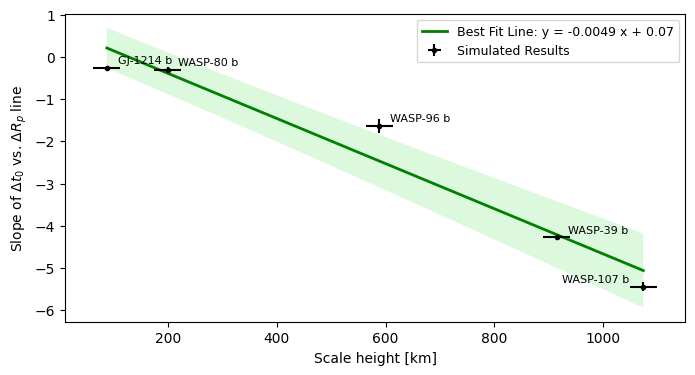

In [16]:
print('Best fit line: slope = m * H + b')
print('m = %.4f +/- %.4f'%(slopeH, slope_errH))
print('b = %.2f +/- %.2f'%(intcptH, intcpt_errH))

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x_fitH, y_fitH, c='green', lw=2, alpha=1, label='Best Fit Line: y = -0.0049 x + 0.07')
ax.fill_between(x_fitH, (y_fitH-yerr_fitH), (y_fitH+yerr_fitH), facecolor='lightgreen', alpha=0.3)
ax.errorbar(scaleheights, slopes, xerr=scaleheight_errs, yerr=slope_errs, zorder=10, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    if label=='GJ-1214 b':
        ax.text(scaleheights[i]+20, slopes[i]+0.1, label, fontsize=8)
        #ax.text(scaleheights[i]-60, slopes[i]-0.4, label, fontsize=8)
    elif label == 'WASP-107 b':
        ax.text(scaleheights[i]-150, slopes[i]+0.1, label, fontsize=8)
    else:
        ax.text(scaleheights[i]+20, slopes[i]+0.1, label, fontsize=8)
ax.set(xlabel='Scale height [km]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right', markerscale=1, fontsize=9)
#plt.savefig('analysis_figures/slopeH_plot.png', dpi=350, bbox_inches='tight')
plt.show()

Planets with smaller scale heights have shallower slopes in the $\Delta t_0$ vs. $\Delta R_p$ relationship, shown in the previous figure. A shallower slope means that, for a given limb asymmetry size, the current transit time needs to be known to tighter precision. 

Notes:
- Error bars for the scale heights are not true. They're set to a stand-in value right now.

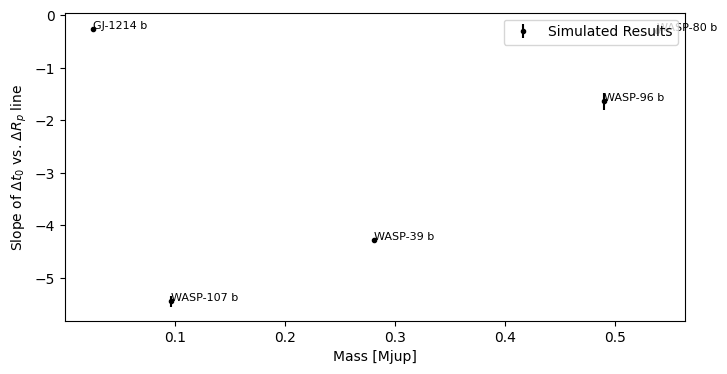

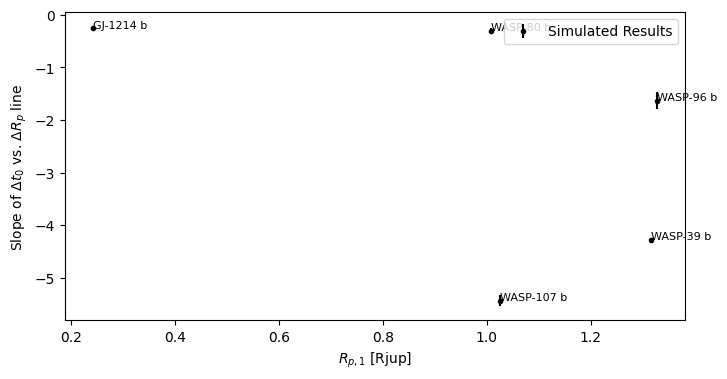

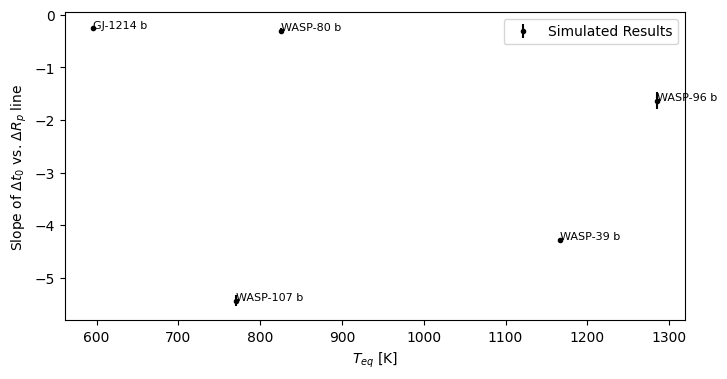

In [17]:
# plotting vs. mass
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(masses, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(masses[i], slopes[i], label, fontsize=8)
ax.set(xlabel='Mass [Mjup]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

# plotting vs. radius
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(radii1, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(radii1[i], slopes[i], label, fontsize=8)
ax.set(xlabel='$R_{p,1}$ [Rjup]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

# plotting vs. Teq
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(Teqs, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(Teqs[i], slopes[i], label, fontsize=8)
ax.set(xlabel='$T_{eq}$ [K]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

Remaining factors:
- does changing the observing cadence change these lines?

In [18]:
# gj 1214 b, scen A:
mmr_gj1214 = np.array([15., 21., 15., 12., 21., 22., 29., 58., 54., 68., 71., 79., 112.])
# wasp_96 b:
mmr_w96 = np.array([13., 9., 26., 27., 32., 48., 73., 87., 113., 128., 159., 182., 201.])
#
mmr_w107 = np.array([15., 49., 65., 122., 155., 244., 373., 499., 651., 816., 996., 1222., 1434.])
#
mmr_w39 = np.array([6., 16., 22., 39., 44., 78., 100., 140., 174., 214., 242., 288., 327.])
#
mmr_w80 = np.array([7., 17., 18., 21., 34., 49., 65., 76., 81., 105., 115., 129., 152.])

In [19]:
fasym = np.copy(fasymA)

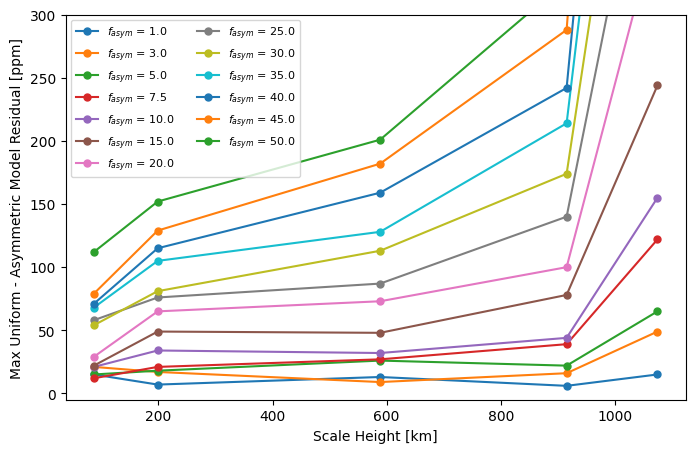

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
for i, f in enumerate(fasym):
#     if (f >= 50):
#         continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(scaleheights, mmr_vals, marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='Max Uniform - Asymmetric Model Residual [ppm]', xlabel='Scale Height [km]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
#plt.savefig('analysis_figures/mmrHplot.png', dpi=400, bbox_inches='tight')
plt.show()

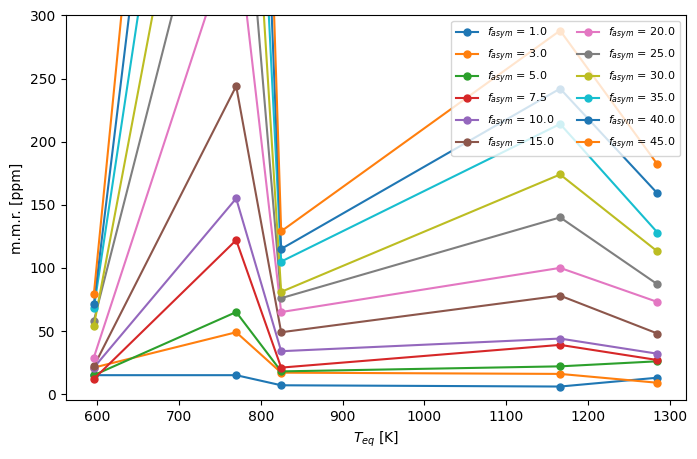

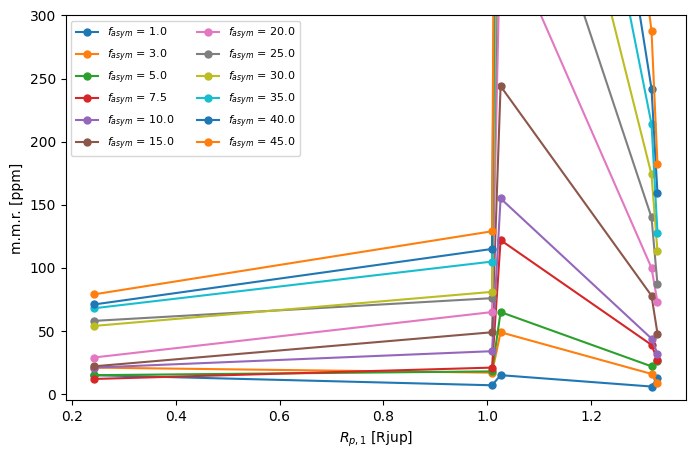

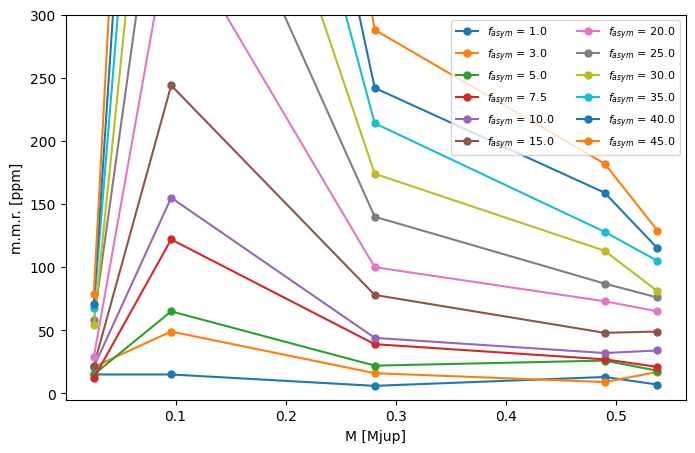

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
Tsort_idxs = np.argsort(Teqs)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(Teqs[Tsort_idxs], mmr_vals[Tsort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='$T_{eq}$ [K]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
Rsort_idxs = np.argsort(radii1)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(radii1[Rsort_idxs], mmr_vals[Rsort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='$R_{p,1}$ [Rjup]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
Msort_idxs = np.argsort(masses)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(masses[Msort_idxs], mmr_vals[Msort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='M [Mjup]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

In [ ]:
Rp